In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from keras.utils  import to_categorical
import pickle

In [2]:
def load_rand():
    X=[]
    dir_path=r"C:\Users\hp\Downloads\food recognition dataset\train"
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X
    

In [3]:
X=load_rand()

 17%|██████████████                                                                      | 1/6 [00:00<00:00,  7.61it/s]

freshapples
freshbanana


 33%|████████████████████████████                                                        | 2/6 [00:00<00:00,  8.41it/s]

freshoranges
rottenapples


 83%|██████████████████████████████████████████████████████████████████████              | 5/6 [00:00<00:00,  8.53it/s]

rottenbanana
rottenoranges


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  8.83it/s]


In [4]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [5]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenoranges', 'rottenapples', 'freshbanana', 'freshoranges', 'rottenbanana', 'freshapples']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

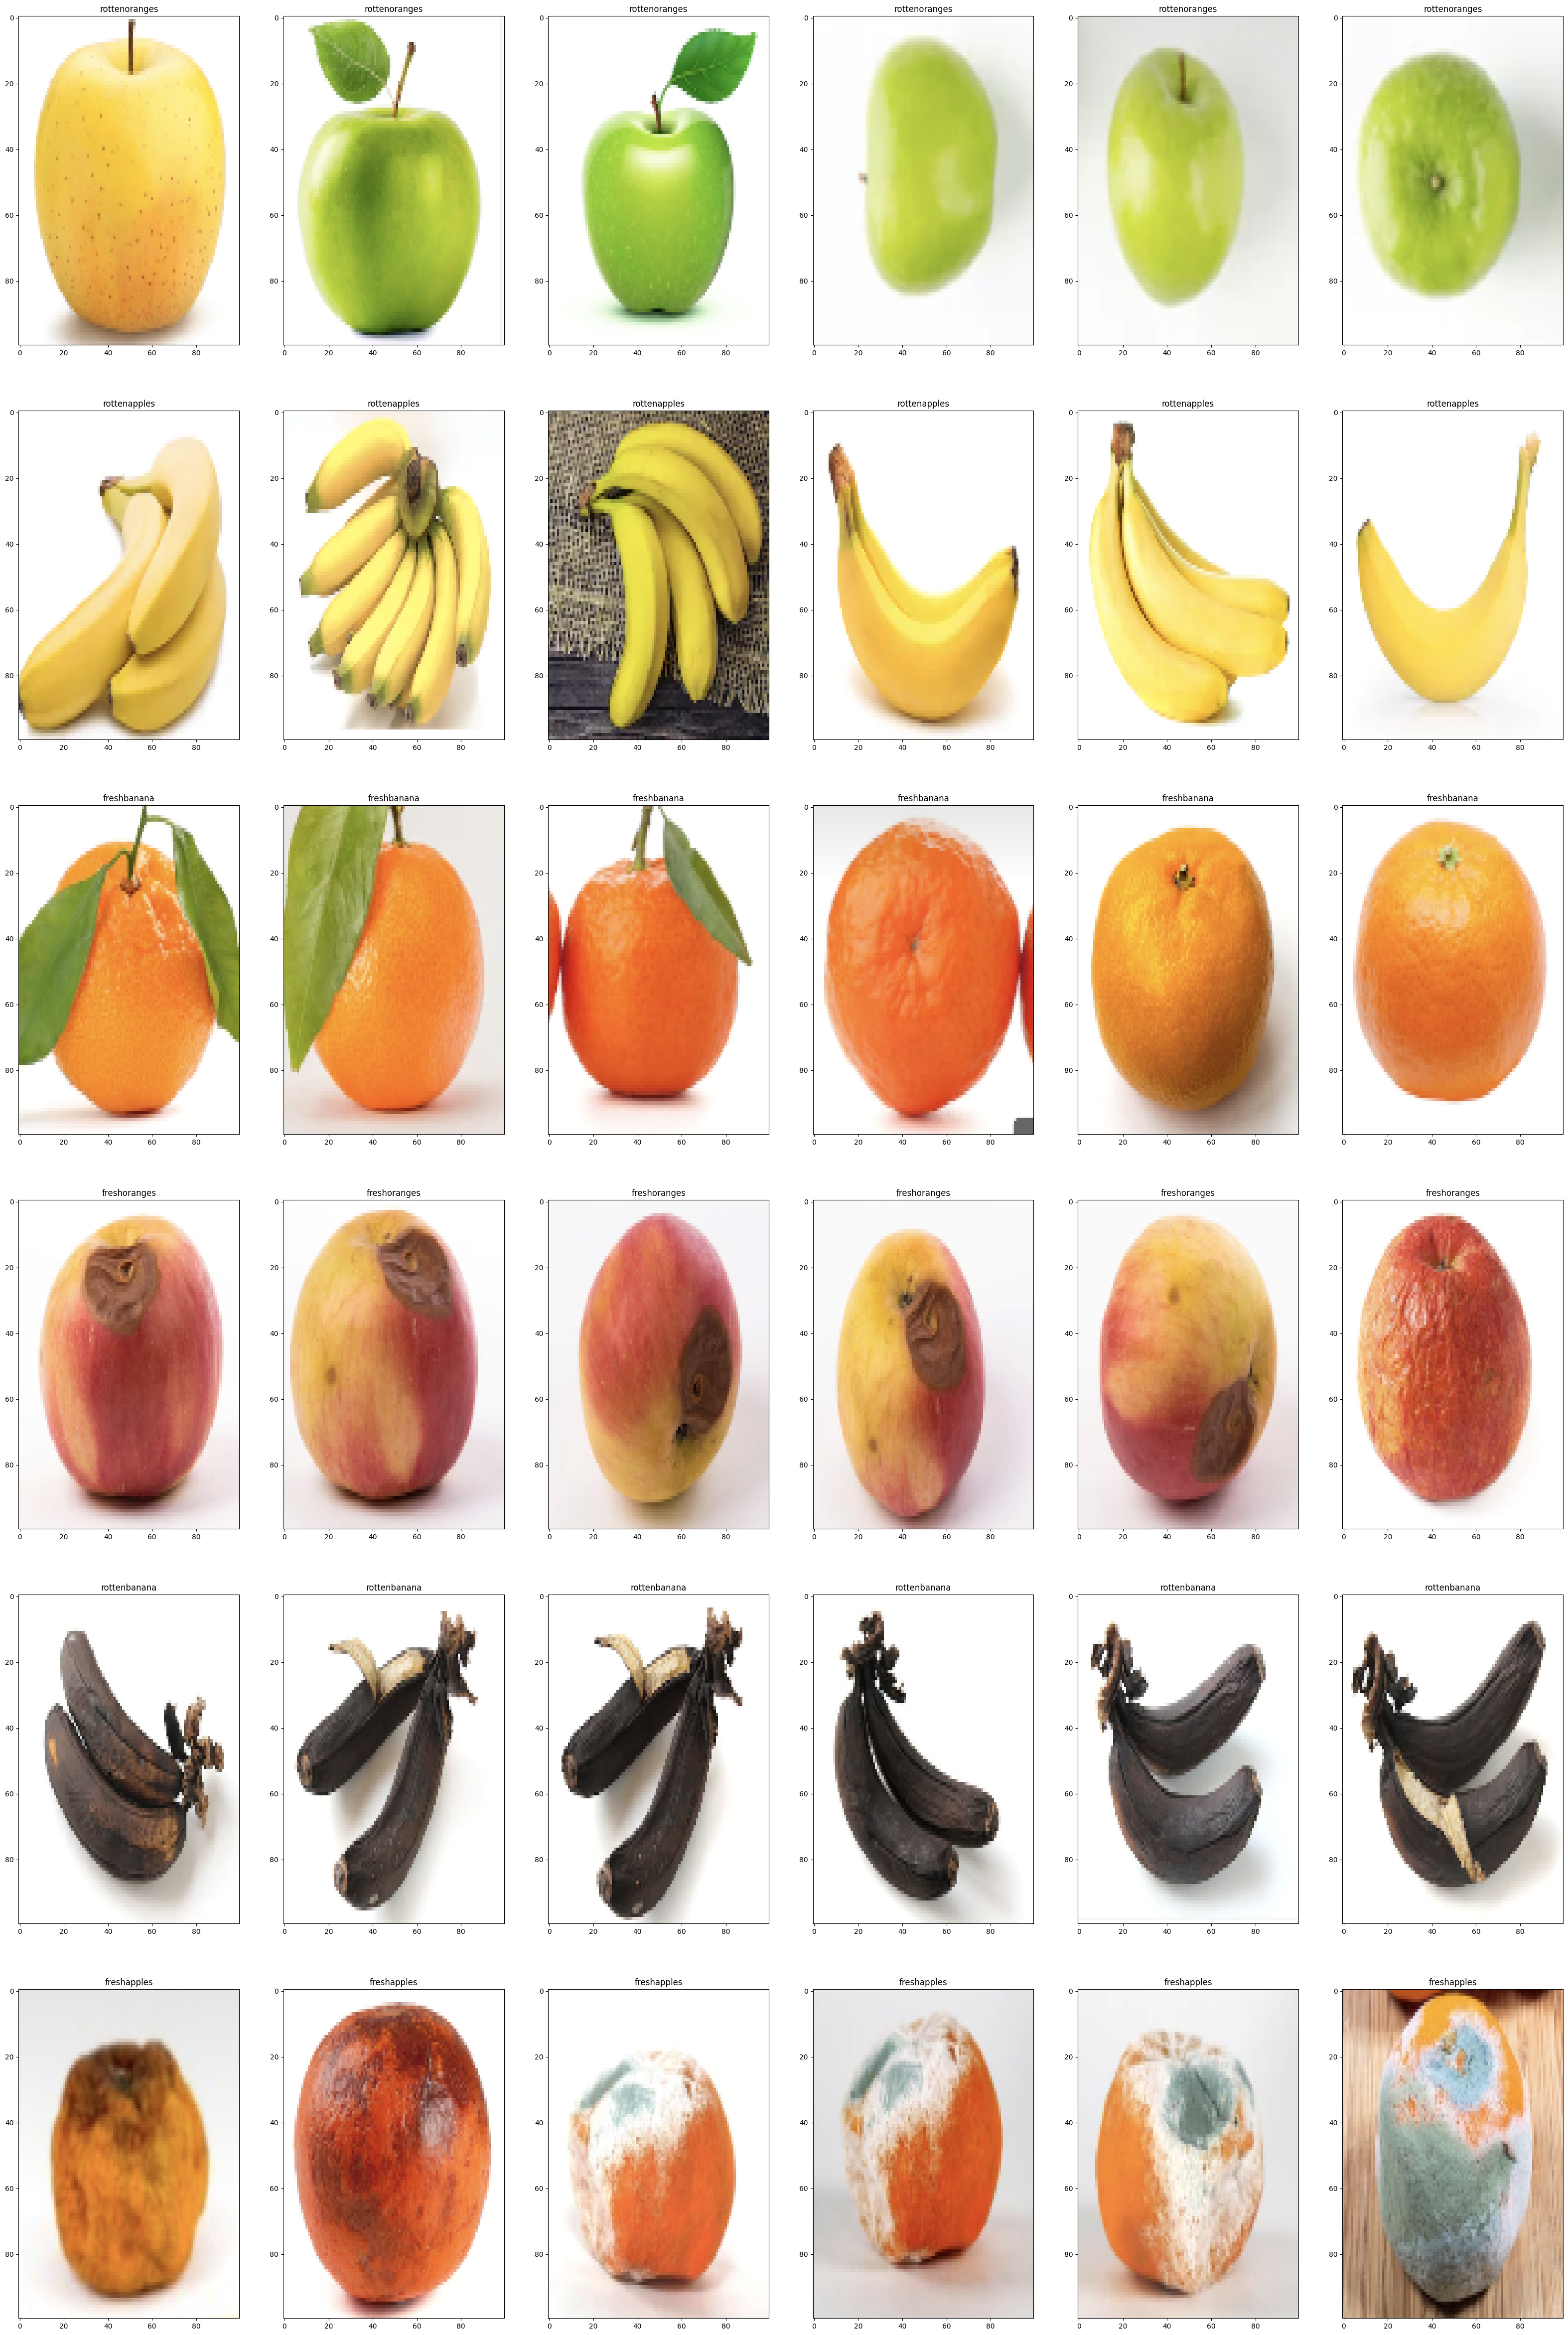

In [6]:
show_subpot(X)

In [7]:
del X

# Rotten vs fresh

In [8]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r"C:\Users\hp\Downloads\food recognition dataset\train")):
        if quality[0] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [9]:
X,Y=load_rottenvsfresh()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:17<00:00,  3.00s/it]


Shuffling your data.....


100%|██████████████████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 605322.27it/s]


In [10]:
Y=np.array(Y)
X=np.array(X)

In [11]:
y_ser=pd.Series(Y)
y_ser.value_counts()

1    686
0    526
Name: count, dtype: int64

In [12]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r"C:\Users\hp\Downloads\food recognition dataset\test")):
        if quality[0] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y            

In [13]:
X_val,Y_val=load_rottenvsfresh_valset()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.30it/s]


Shuffling your data.....


100%|████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<?, ?it/s]


In [14]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    170
0    130
Name: count, dtype: int64

In [15]:
import keras 
from keras.layers import Dense,Dropout, Conv2D,MaxPooling2D , Activation, Flatten, BatchNormalization, SeparableConv2D
from keras.models import Sequential

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())
model.add(SeparableConv2D(32, (3, 3),
                          depthwise_initializer='he_uniform',
                          pointwise_initializer='he_uniform',
                          padding='same',
                          activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(SeparableConv2D(64, (3, 3),
                          depthwise_initializer='he_uniform',
                          pointwise_initializer='he_uniform',
                          padding='same',
                          activation='relu'))
model.add(SeparableConv2D(64, (3, 3),
                          depthwise_initializer='he_uniform',
                          pointwise_initializer='he_uniform',
                          padding='same',
                          activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 100, 100, 32)        │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_2 (SeparableConv2D) │ (None, 50, 50, 64)          │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_3 (SeparableConv2D) │ (None, 50, 50, 64)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,591,393 (9.89 MB)

 Trainable params: 2,590,881 (9.88 MB)

 Non-trainable params: 512 (2.00 KB)

In [19]:
import tensorflow as tf

In [21]:
lr_rate = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=6,
    verbose=1,
    mode='max',
    min_lr=0.00002,
    cooldown=2
)

check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath='/kaggle/working/rotten.h5',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='min'
)

model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


In [22]:
X=X/255.0
X_val=X_val/255.0

In [40]:
history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_val),epochs= 5,
                 callbacks=[check_point])

Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.9675 - loss: 0.0963 
Epoch 1: val_loss did not improve from 0.19845
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 556ms/step - accuracy: 0.9673 - loss: 0.0972 - val_accuracy: 0.9067 - val_loss: 0.3726
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.9608 - loss: 0.1109 
Epoch 2: val_loss did not improve from 0.19845
61/61 ━━━━━━━━━━━━━━━━━━━━ 34s 561ms/step - accuracy: 0.9608 - loss: 0.1110 - val_accuracy: 0.9067 - val_loss: 0.5277
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.9631 - loss: 0.1161 
Epoch 3: val_loss did not improve from 0.19845
61/61 ━━━━━━━━━━━━━━━━━━━━ 36s 594ms/step - accuracy: 0.9633 - loss: 0.1156 - val_accuracy: 0.8967 - val_loss: 0.6076
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.9886 - loss: 0.0371 
Epoch 4: val_loss did not improve from 0.19845
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 535ms/step - accuracy: 0.9885 - loss: 0.0372 - val_accuracy: 0.9233 - val_loss: 0.3

Epoch 29/50
545/546 [============================>.] - ETA: 0s - loss: 0.0537 - accuracy: 0.9852
Epoch 00029: val_loss did not improve from 0.01350
546/546 [==============================] - 28s 52ms/step - loss: 0.0537 - accuracy: 0.9852 - val_loss: 0.2748 - val_accuracy: 0.9073
Epoch 30/50
545/546 [============================>.] - ETA: 0s - loss: 0.0375 - accuracy: 0.9882
Epoch 00030: val_loss improved from 0.01350 to 0.01011, saving model to /kaggle/working/rotten.h5
546/546 [==============================] - 28s 52ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0101 - val_accuracy: 0.9959
Epoch 31/50
545/546 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9938
Epoch 00031: val_loss did not improve from 0.01011
546/546 [==============================] - 27s 50ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0415 - val_accuracy: 0.9878
Epoch 32/50
545/546 [============================>.] - ETA: 0s - loss: 0.0590 - accuracy: 0.9807
Epoch 00032: 

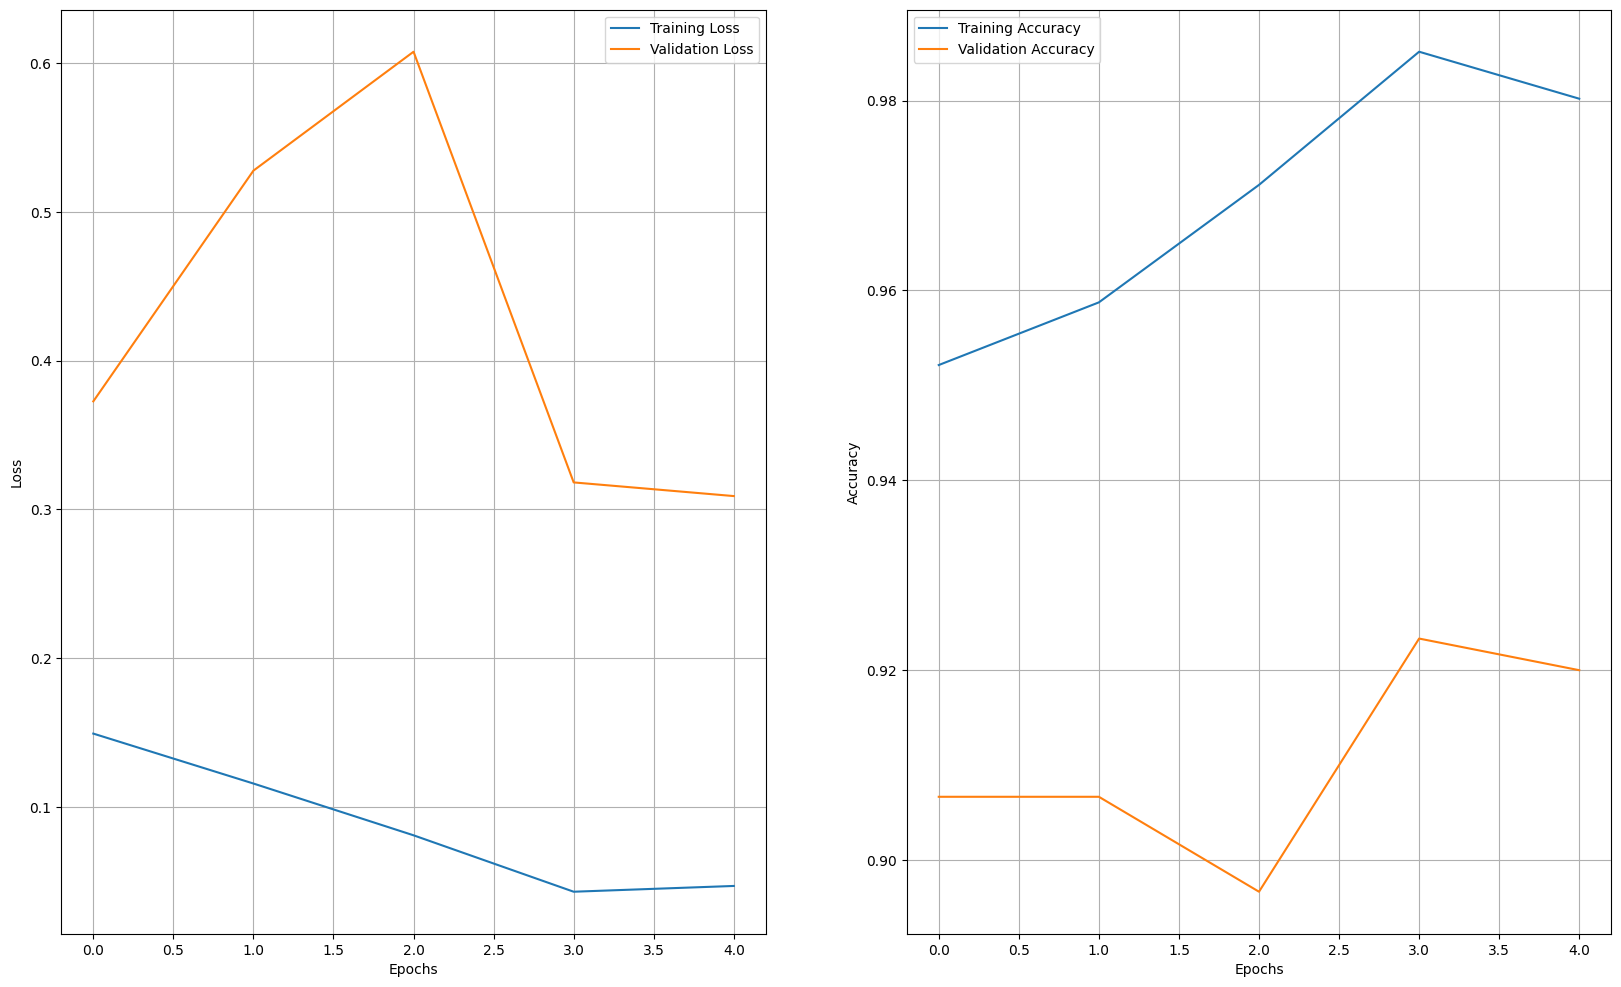

In [41]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [42]:
model.evaluate(X_val,Y_val)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - accuracy: 0.9261 - loss: 0.2589


[0.30900299549102783, 0.9200000166893005]

In [43]:
model.save('/kaggle/working/rottenvsfresh.h5')

In [44]:
from keras.models import Model, load_model

In [45]:
new_model=load_model('/kaggle/working/rotten.h5')

In [46]:
new_model.evaluate(X_val,Y_val)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9228 - loss: 0.1582


[0.19845233857631683, 0.9166666865348816]

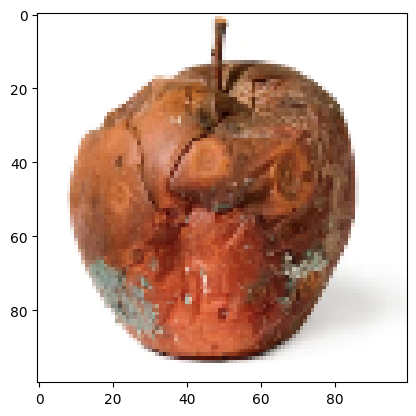

In [47]:
plt.imshow(X_val[0])

In [48]:
model.predict(X_val[0].reshape(1,100,100,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[1.]], dtype=float32)

In [49]:
show_subpot(X_val[-36*11:-36*10])

Cannot plot


In [52]:
# model.predict_classes(X_val[-36*11:-36*10])

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [54]:
# For example, if len(X_val) = 100:
predictions = model.predict(X_val[60:70])  # 10 samples
predicted_classes = predictions.argmax(axis=1)  # For multi-class


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


# Category of Fruits

In [57]:
def load_fruits_data():
    quality=['apples', 'banana','oranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r"C:\Users\hp\Downloads\food recognition dataset\test")):
        if quality[0] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\test",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [58]:
def load_fruits_train_data():
    quality=['apples', 'banana','oranges']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir(r"C:\Users\hp\Downloads\food recognition dataset\train")):
        if quality[0] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        elif quality[1] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
        elif quality[2] in cata:
            path_main=os.path.join(r"C:\Users\hp\Downloads\food recognition dataset\train",cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,2])
        
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y 
    

In [59]:
X_val,Y_val=load_fruits_data()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.01it/s]


Shuffling your data.....


100%|████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 299450.55it/s]


In [60]:
X,Y=load_fruits_train_data()

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:22<00:00,  3.74s/it]


Shuffling your data.....


100%|██████████████████████████████████████████████████████████████████████████| 1212/1212 [00:00<00:00, 606043.93it/s]


In [61]:
X=np.array(X)
X_val=np.array(X_val)

In [62]:
X.shape,X_val.shape

((1212, 100, 100, 3), (300, 100, 100, 3))

In [63]:
X=X/255.0
X_val=X_val/255.0

In [64]:
Y=to_categorical(Y)
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [65]:
Y_test=to_categorical(Y_val)
Y_val=np.array(Y_val)

In [66]:
Y.shape,Y_test.shape, Y_val.shape

((1212, 3), (300, 3), (300,))

In [68]:
model = Sequential()

# Initial Conv2D layer
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', activation='relu', input_shape=(100,100,3)))
model.add(BatchNormalization())

# Replacing SeparableConv2D initializer
model.add(SeparableConv2D(32, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Next SeparableConv2D blocks
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(64, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3, 3), depthwise_initializer='he_uniform', pointwise_initializer='he_uniform', padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.3))

model.add(Dense(3, activation='softmax'))

In [71]:
# from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# lr_rate = ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.5,
#     patience=6,
#     verbose=1,
#     mode='max',
#     min_lr=0.00002,
#     cooldown=2
# )

# check_point = ModelCheckpoint(
#     filepath='/kaggle/working/fruit_cata.h5',
#     monitor='val_loss',
#     verbose=1,
#     save_best_only=True,
#     save_weights_only=False,
#     mode='min'
# )


In [72]:
# history=model.fit(X,Y,batch_size=20,validation_data=(X_val,Y_test),epochs= 40,
#                  callbacks=[check_point])

ValueError: You must call `compile()` before using the model.

Epoch 29/40
545/546 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9859
Epoch 00029: val_loss improved from 0.01956 to 0.01844, saving model to /kaggle/working/fruit_cata.h5
546/546 [==============================] - 32s 59ms/step - loss: 0.0481 - accuracy: 0.9859 - val_loss: 0.0184 - val_accuracy: 0.9930
Epoch 30/40
545/546 [============================>.] - ETA: 0s - loss: 0.0464 - accuracy: 0.9861
Epoch 00030: val_loss did not improve from 0.01844
546/546 [==============================] - 33s 60ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.1315 - val_accuracy: 0.9603
Epoch 31/40
545/546 [============================>.] - ETA: 0s - loss: 0.0567 - accuracy: 0.9830
Epoch 00031: val_loss did not improve from 0.01844
546/546 [==============================] - 32s 59ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0509 - val_accuracy: 0.9822
Epoch 32/40
545/546 [============================>.] - ETA: 0s - loss: 0.0557 - accuracy: 0.9837
Epoch 000

In [74]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # or 'sparse_categorical_crossentropy' if labels are integers
    optimizer=Adam(learning_rate=0.001),  # ✅ use learning_rate, not lr
    metrics=['accuracy']
)

# Callbacks
lr_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=6,
    verbose=1,
    mode='max',
    min_lr=0.00002,
    cooldown=2
)

check_point = ModelCheckpoint(
    filepath='fruit_cata.h5',  # or provide full path
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode='min'
)

# Fit the model
history = model.fit(
    X, Y,
    batch_size=20,
    validation_data=(X_val, Y_test),
    epochs=5,
    callbacks=[check_point, lr_rate]  # ✅ include all callbacks
)


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.7126 - loss: 0.8328 
Epoch 1: val_loss improved from inf to 1.12217, saving model to fruit_cata.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 550ms/step - accuracy: 0.7128 - loss: 0.8309 - val_accuracy: 0.2833 - val_loss: 1.1222 - learning_rate: 0.0010
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8440 - loss: 0.4206 
Epoch 2: val_loss improved from 1.12217 to 1.10686, saving model to fruit_cata.h5


61/61 ━━━━━━━━━━━━━━━━━━━━ 32s 532ms/step - accuracy: 0.8441 - loss: 0.4202 - val_accuracy: 0.2833 - val_loss: 1.1069 - learning_rate: 0.0010
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8921 - loss: 0.3051 
Epoch 3: val_loss did not improve from 1.10686
61/61 ━━━━━━━━━━━━━━━━━━━━ 32s 529ms/step - accuracy: 0.8920 - loss: 0.3053 - val_accuracy: 0.3700 - val_loss: 1.1317 - learning_rate: 0.0010
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.8809 - loss: 0.3157 
Epoch 4: val_loss did not improve from 1.10686
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 543ms/step - accuracy: 0.8809 - loss: 0.3159 - val_accuracy: 0.2833 - val_loss: 1.2259 - learning_rate: 0.0010
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.9085 - loss: 0.2323 
Epoch 5: val_loss did not improve from 1.10686
61/61 ━━━━━━━━━━━━━━━━━━━━ 32s 529ms/step - accuracy: 0.9086 - loss: 0.2325 - val_accuracy: 0.2833 - val_loss: 1.4531 - learning_rate: 0.0010


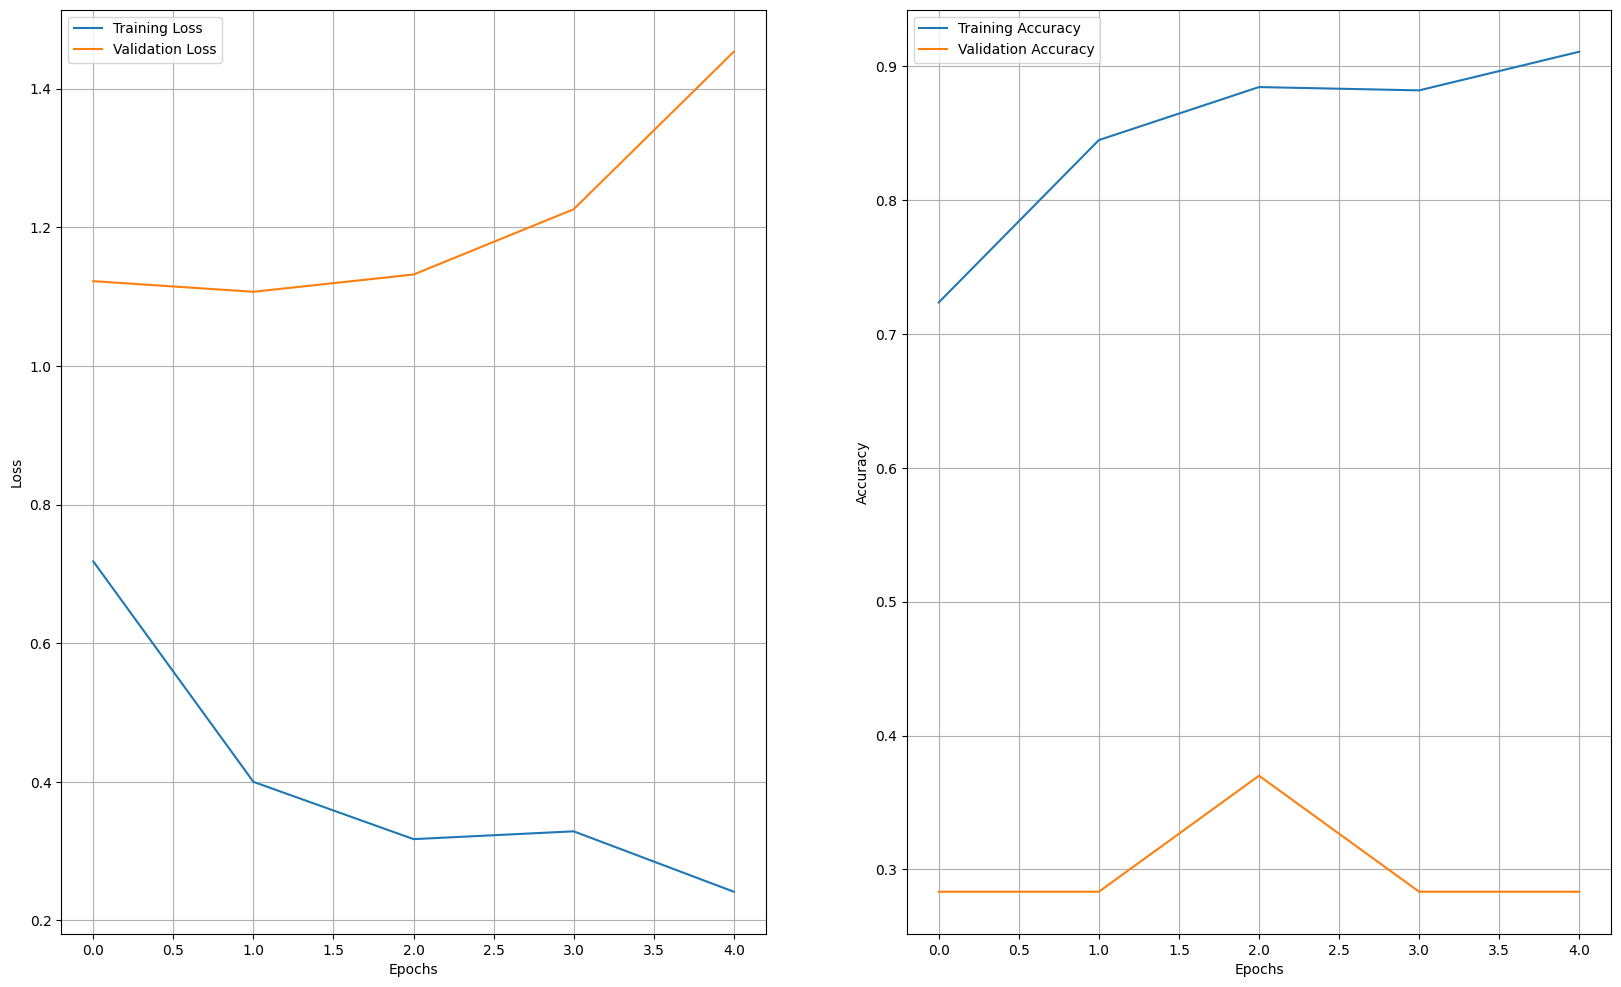

In [75]:
plt.figure(1, figsize = (20, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [76]:
model=load_model('fruit_cata.h5')

In [77]:
model.evaluate(X,Y)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.2751 - loss: 1.1057


[1.1068556308746338, 0.2830033004283905]

In [78]:
# show_subpot(X_val[:36],title=True,Y=model.predict_classes(X_val[:36]))

AttributeError: 'Sequential' object has no attribute 'predict_classes'

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step


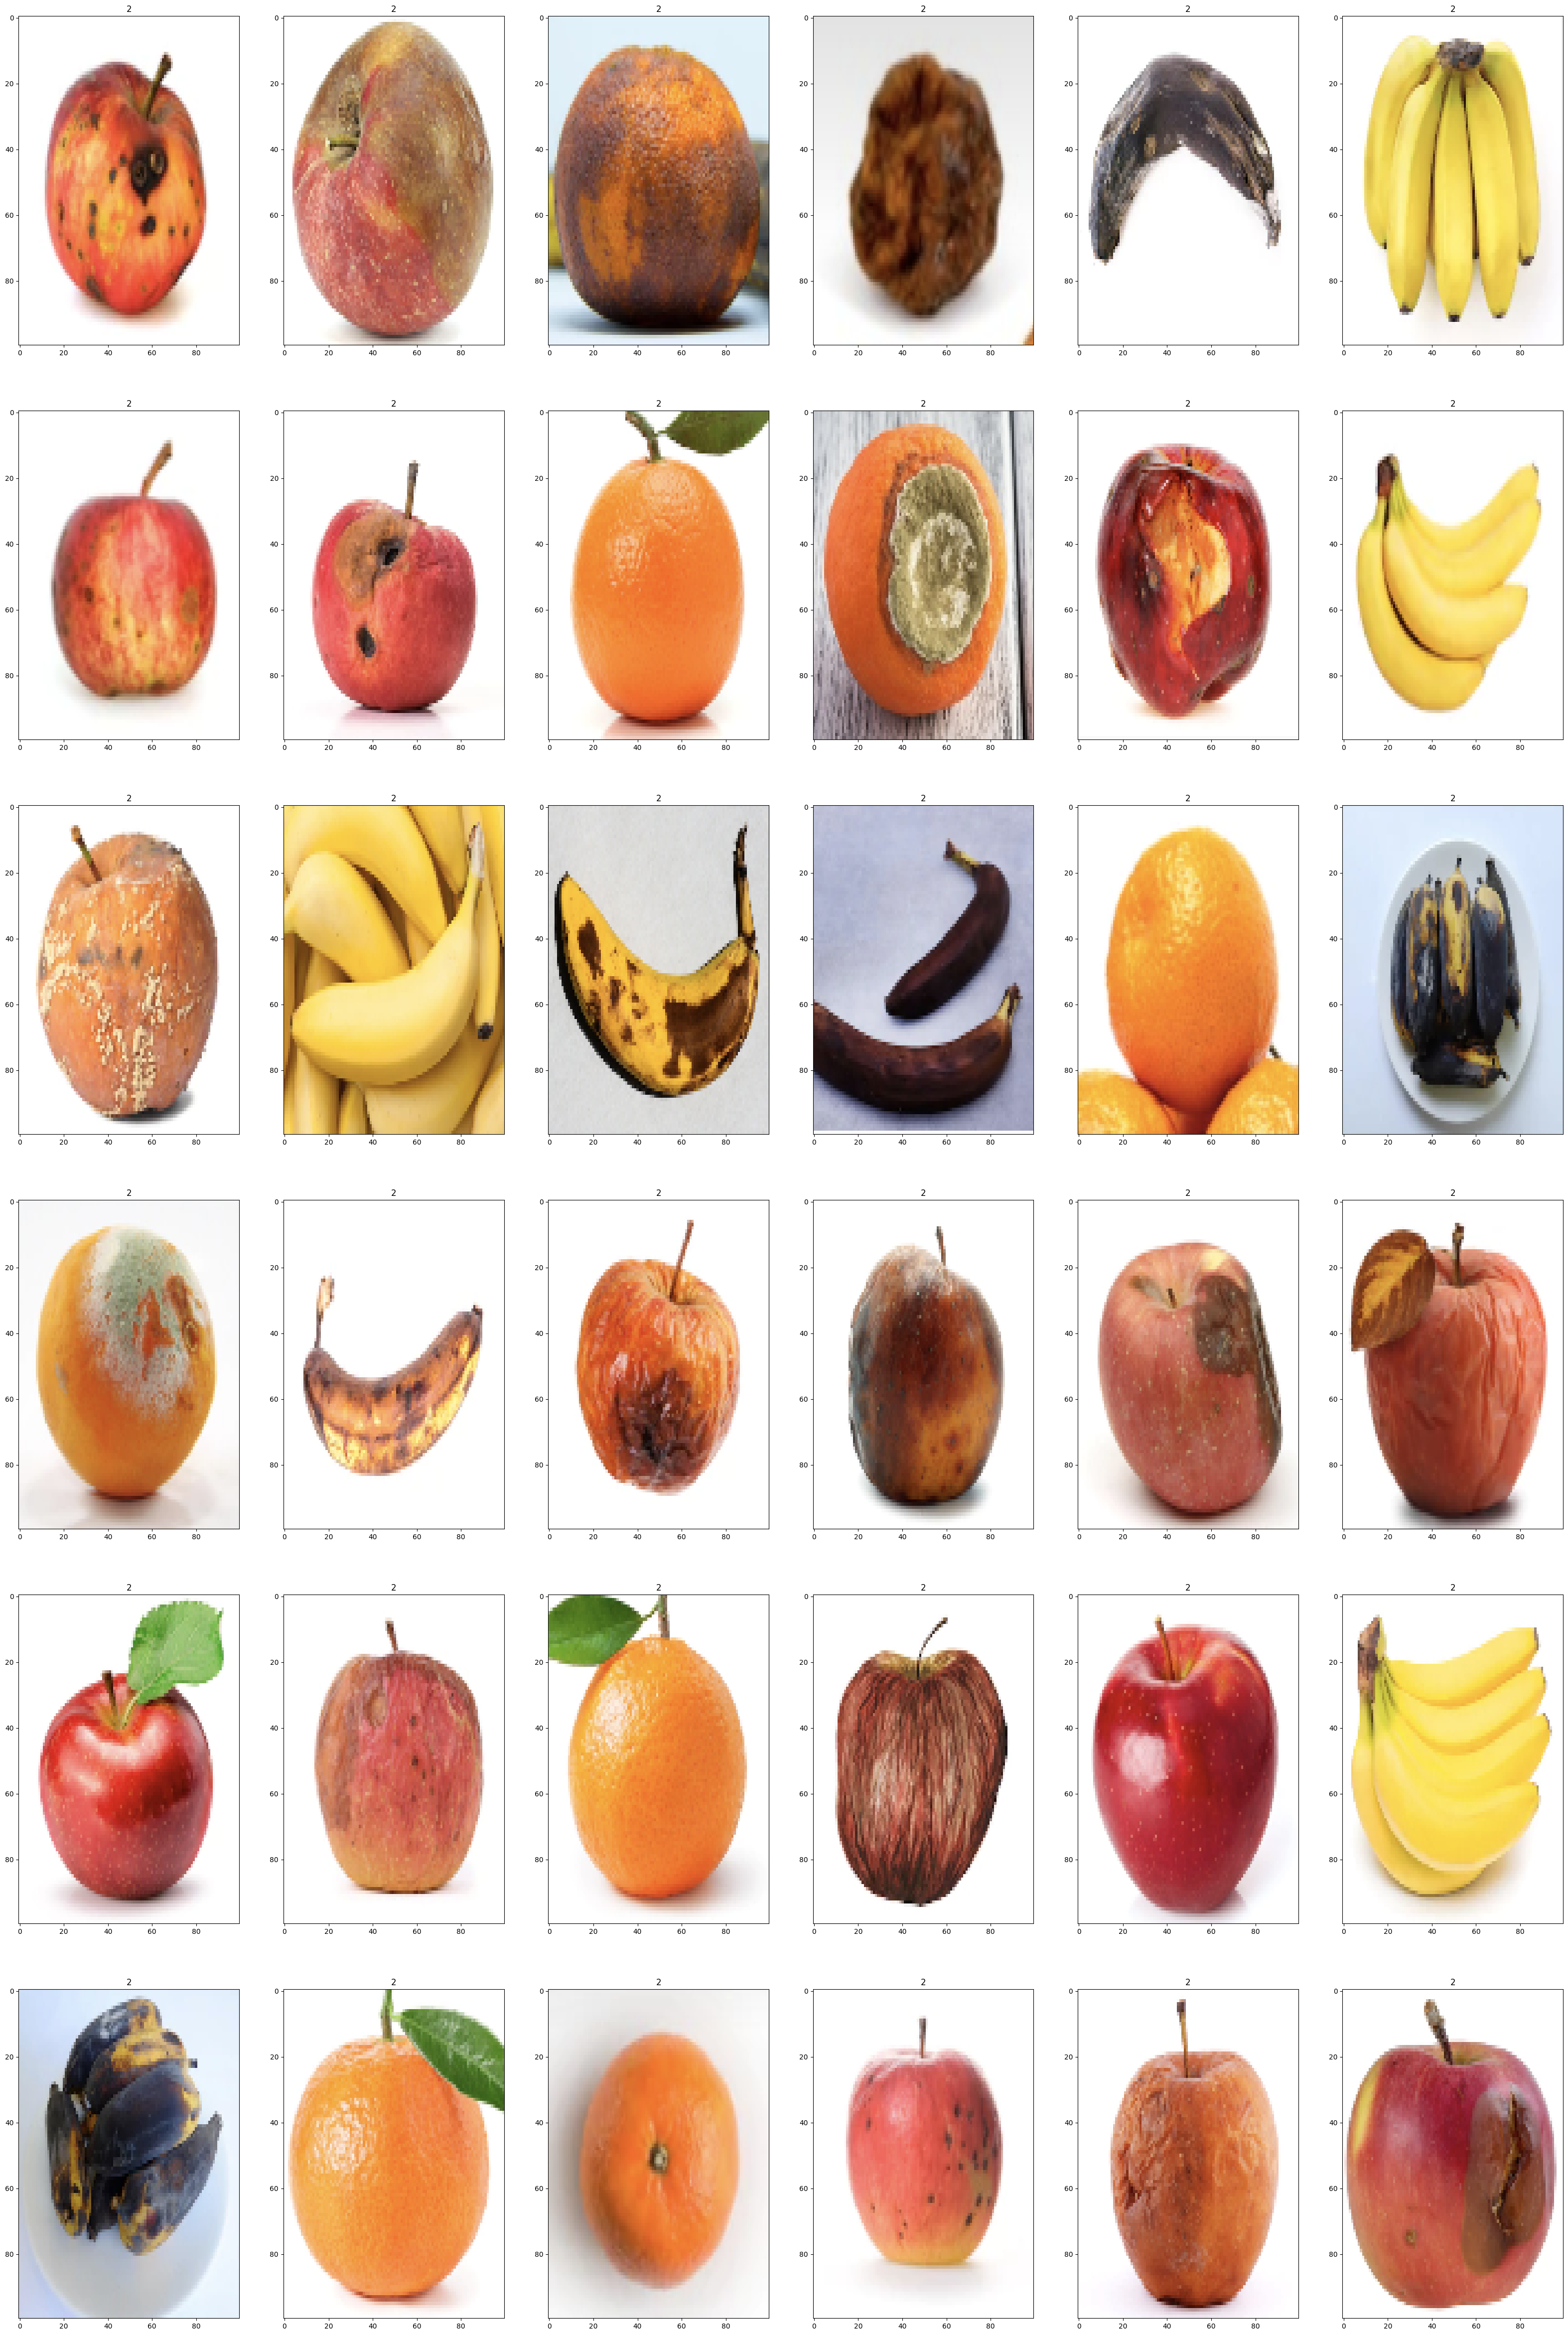

In [79]:
import numpy as np

# Get predicted probabilities
predictions = model.predict(X_val[:36])

# Get predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Now pass to your function
show_subpot(X_val[:36], title=True, Y=predicted_classes)


In [80]:
# model.predict_classes(X_val[:36])

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [81]:
import numpy as np

# Get predicted probabilities
predictions = model.predict(X_val[:36])

# Convert to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Use predicted_classes as needed
print(predicted_classes)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
